In [13]:
import nibabel as nb
import numpy as np
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import SUITPy as suit 
import nitools as nt 
import Functional_Fusion.plot as plot
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sb
from scipy import stats
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion' 
atlas_dir = base_dir + '/Atlases/tpl-MNI152NLin2009cSymC'
wk_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/atlases/thalamus'


In [9]:
all = np.load(f"{wk_dir}/Prob_thalamus.npy")
mdtb = np.load(f"{wk_dir}/Prob_thalamus_mdtb_ses1.npy")  
pontine = np.load(f"{wk_dir}/Prob_thalamus_high-res-mdtb.npy")
lang = np.load(f"{wk_dir}/Prob_thalamus_language.npy")
mdtb2 = np.load(f"{wk_dir}/Prob_thalamus_mdtb_ses2.npy")

print(all.shape)
print(lang.shape)

(32, 25640)
(32, 25640)


In [3]:
all = np.load(f"{wk_dir}/Prob_dentate.npy")
mdtb = np.load(f"{wk_dir}/Prob_dentate_mdtb(ses1).npy")  
pontine = np.load(f"{wk_dir}/Prob_dentate_pontine.npy")
lang = np.load(f"{wk_dir}/Prob_dentate_language.npy")
mdtb2 = np.load(f"{wk_dir}/Prob_dentate_mdtb(ses2).npy")

all_5 = np.load(f"{wk_dir}/Prob_dentate_5parcels.npy")
mdtb_5 = np.load(f"{wk_dir}/Prob_dentate_mdtb(ses1)_5parcels.npy")  
pontine_5 = np.load(f"{wk_dir}/Prob_dentate_pontine_5parcels.npy")
lang_5 = np.load(f"{wk_dir}/Prob_dentate_language_5parcels.npy")
mdtb2_5 = np.load(f"{wk_dir}/Prob_dentate_mdtb(ses2)_5parcels.npy")


print(all_5.shape)
print(mdtb_5.shape)



(4, 3934)
(4, 3934)


In [14]:
thalamus_maps = [all, mdtb, pontine, lang, mdtb2]
titles = ['All', 'MDTB_ses1', 'HighRes_MDTB', 'Language', 'MDTB_ses2']

lid,cmap,names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')

for i, pmap in enumerate(thalamus_maps):
    print(titles[i])
    wta = np.argmax(pmap, axis=0) + 1
    wta_int32 = wta.astype(np.int32)
    thalamus_parcellation = plot.plot_thalamus(wta_int32, cscale=[0,32], cmap=cmap)
    plt.show()



All


NameError: Data needs to be a P vector or NxP matrix

All


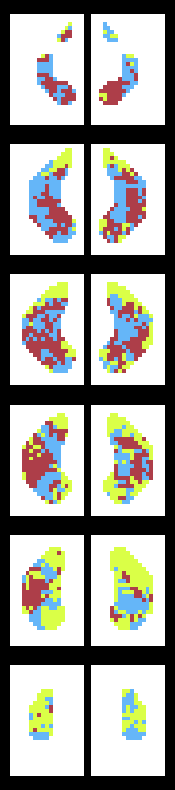

MDTB_ses1


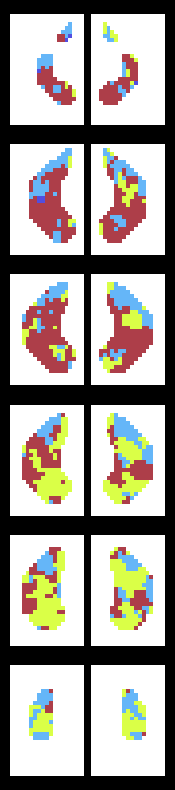

Pontine7T


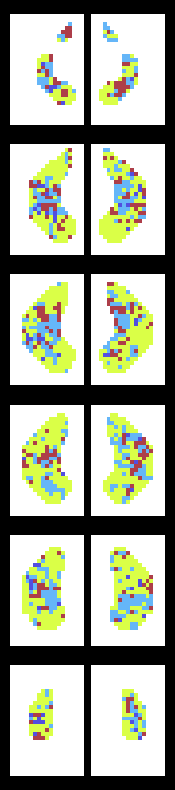

Language


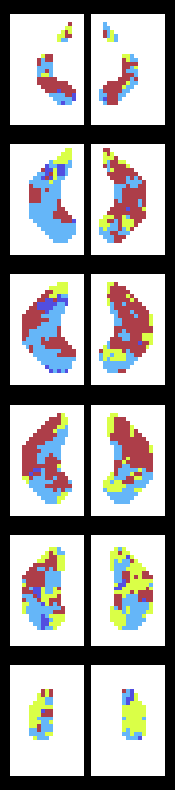

MDTB_ses2


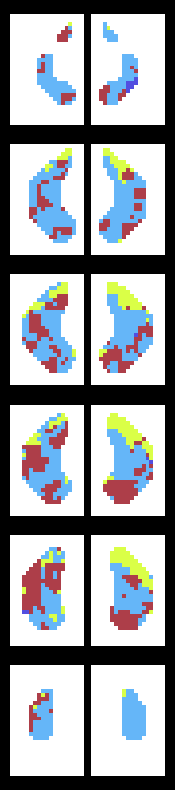

In [5]:
#5 regions amalgamation

dentate_maps = [all_5, mdtb_5, pontine_5, lang_5, mdtb2_5]
titles = ['All', 'MDTB_ses1', 'Pontine7T', 'Language', 'MDTB_ses2']

lid,cmap,roi_names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')

new_labels = ['0','M','A','D','S'] 


for i, pmap in enumerate(dentate_maps):
    print(titles[i])
    new_cmap = cmap[[0,3,6,8,13],:]
    wta = np.argmax(pmap, axis=0) 
    wta += 1
    wta_int32 = wta.astype(np.int32)
    dentate_parcellation = plot.plot_dentate(wta_int32,cscale=[0,5],cmap=new_cmap)
    plt.show()

#0, M (3: blue), A (6: dark blue), D (8: maroon), S (13: yellow)

